In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
t_start = time.time()
mel_layer = Spectrogram.CQT1992v2(sr=44100, n_bins=84*2, bins_per_octave=24, fmin=55)
time_used = time.time()-t_start
print(time_used)

CQT kernels created, time used = 0.1953 seconds
0.19559359550476074


In [4]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [5]:
timing = []

for e in range(20):
    t_start = time.time()
    spec = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

9.709592342376709
10.042158842086792
9.765102624893188
10.083208322525024
9.922554969787598
9.465622901916504
9.849183082580566
10.709666013717651
9.427127838134766
9.476212739944458
9.371801853179932
9.65549635887146
9.883880615234375
9.646806240081787
9.748564720153809
9.746578454971313
9.991620063781738
9.876994132995605
9.296047449111938
9.440593242645264


In [6]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  9.755440640449525
std =  0.31425831425065576


In [7]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch'

In [8]:
data.to_csv('CQT1992_torch')

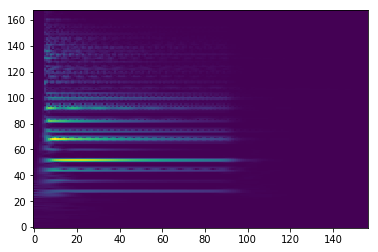

In [9]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')